#using google jupyter notebook on colab for the analysis

In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import plotly.express as px

In [ ]:
#nba_20 = pd.read_excel('/content/2019-2020 NBA Player Stats  NBAstuffer.xlsx')
nba_20_copy=pd.read_excel('/content/drive/MyDrive/2019-2020 NBA Player Stats  NBAstuffer.xlsx')
#nba_20 = pd.read_excel('/2019-2020 NBA Player Stats  NBAstuffer.xlsx')
nba_20_copy.head(3)

,RANK,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor,"USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor",TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions,FTA,FT%,2PA,2P%,3PA,3P%,"eFG%Effective Shooting PercentageWith eFG%, three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA","TS%True Shooting PercentageTrue shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.",PPGPointsPoints per game.,RPGReboundsRebounds per game.,TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.,APGAssistsAssists per game.,AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court,SPGStealsSteals per game.,BPGBlocksBlocks per game.,TOPGTurnoversTurnovers per game.,"VIVersatility IndexVersatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10",ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.,DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.
0,NaN,Jaylen Adams,Por,G,24.44,3,6.9,14.4,18.1,0.0,0,0.000,5,0.600,4,0.0,0.333,0.333,2.0,1.0,7.6,0.7,15.1,0.33,0.00,0.00,6.5,88.9,114.2
1,NaN,Steven Adams,Okc,C,27.23,7,30.0,62.6,15.7,20.8,20,0.450,51,0.608,1,0.0,0.596,0.584,10.1,11.6,20.1,1.3,7.1,0.57,0.29,2.29,7.1,112.8,105.1
2,NaN,Bam Adebayo,Mia,C-F,23.24,19,36.2,75.4,21.0,14.8,115,0.783,219,0.566,1,0.0,0.564,0.625,17.8,10.3,16.5,4.4,20.5,1.00,0.84,2.47,10.3,121.4,102.1


In [ ]:
nba_20_copy.tail(3)

,RANK,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor,"USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor",TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions,FTA,FT%,2PA,2P%,3PA,3P%,"eFG%Effective Shooting PercentageWith eFG%, three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA","TS%True Shooting PercentageTrue shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.",PPGPointsPoints per game.,RPGReboundsRebounds per game.,TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.,APGAssistsAssists per game.,AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court,SPGStealsSteals per game.,BPGBlocksBlocks per game.,TOPGTurnoversTurnovers per game.,"VIVersatility IndexVersatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10",ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.,DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.
213,NaN,Marvin Williams,Mil,F,34.32,10,17.9,37.2,12.4,5.8,3,1.000,24,0.458,23,0.435,0.553,0.569,5.5,4.8,14.4,0.9,7.1,0.50,0.30,0.30,6.4,123.6,97.9
214,NaN,Delon Wright,Dal,G,28.46,4,13.3,27.7,13.9,29.1,5,0.600,8,0.625,2,0.500,0.650,0.656,4.0,0.8,3.1,1.8,17.5,1.25,0.00,1.25,5.4,107.5,110.3
215,NaN,Ivica Zubac,Lac,C,23.57,13,24.6,51.3,14.5,11.3,37,0.811,78,0.564,0,0.000,0.564,0.626,9.1,7.2,16.2,0.6,3.5,0.15,0.77,0.92,5.5,126.1,100.3


In [ ]:
nba_20_copy.MPG.min()

0.2

In [ ]:
nba_20_copy[nba_20_copy.MPG == 0.2]

,RANK,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor,"USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor",TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions,FTA,FT%,2PA,2P%,3PA,3P%,"eFG%Effective Shooting PercentageWith eFG%, three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA","TS%True Shooting PercentageTrue shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.",PPGPointsPoints per game.,RPGReboundsRebounds per game.,TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.,APGAssistsAssists per game.,AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court,SPGStealsSteals per game.,BPGBlocksBlocks per game.,TOPGTurnoversTurnovers per game.,"VIVersatility IndexVersatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10",ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.,DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.
103,NaN,Alize Johnson,Ind,F,24.47,1,0.2,0.4,0.0,NaN,0,0.0,0,0.0,0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [ ]:
px.histogram(nba_20_copy, x = 'AGE', y = 'MPG',facet_col='TEAM', color='POS')

#Bar graph Minutes per game Vs. Age

In [ ]:
px.bar(nba_20_copy, y = 'AGE', x = 'MPG', color='POS', title='Minutes Vs. Age')

In [ ]:
px.scatter(nba_20_copy, y = 'AGE', x = 'MPG', color='POS', title='Minutes Vs. Age', template='plotly_dark')

#

#Analysis by Position-Age-Minutes

In [ ]:
pd.pivot_table(nba_20_copy, index=['POS', 'AGE'], values='MPG', aggfunc='count')

#Maximum minutes per game

In [ ]:
nba_20_copy.MPG.max()

40.6

#How many players played the whole game

In [ ]:
#nba_20_copy[nba_20_copy.MPG == nba_20_copy.MPG.max()]
nba_20_copy.loc[nba_20_copy.MPG == 40.6]

,RANK,FULL_NAME,TEAM,POS,AGE,GP,MPG,MIN%Minutes_PercentagePercentage_of_team_minutes_used_by_a_player_while_he_was_on_the_floor,"USG%Usage_RateUsage_rate,_a.k.a.,_usage_percentage_is_an_estimate_of_the_percentage_of_team_plays_used_by_a_player_while_he_was_on_the_floor",TO%Turnover_RateA_metric_that_estimates_the_number_of_turnovers_a_player_commits_per_100_possessions,FTA,FT%,2PA,2P%,3PA,3P%,"eFG%Effective_Shooting_PercentageWith_eFG%,_three-point_shots_made_are_worth_50%_more_than_two-point_shots_made._eFG%_Formula=(FGM+_(0.5_x_3PM))/FGA","TS%True_Shooting_PercentageTrue_shooting_percentage_is_a_measure_of_shooting_efficiency_that_takes_into_account_field_goals,_3-point_field_goals,_and_free_throws.",PPGPointsPoints_per_game.,RPGReboundsRebounds_per_game.,TRB%Total_Rebound_PercentageTotal_rebound_percentage_is_estimated_percentage_of_available_rebounds_grabbed_by_the_player_while_the_player_is_on_the_court.,APGAssistsAssists_per_game.,AST%Assist_PercentageAssist_percentage_is_an_estimated_percentage_of_teammate_field_goals_a_player_assisted_while_the_player_is_on_the_court,SPGStealsSteals_per_game.,BPGBlocksBlocks_per_game.,TOPGTurnoversTurnovers_per_game.,"VIVersatility_IndexVersatility_index_is_a_metric_that_measures_a_player’s_ability_to_produce_in_points,_assists,_and_rebounds._The_average_player_will_score_around_a_five_on_the_index,_while_top_players_score_above_10",ORTGOffensive_RatingIndividual_offensive_rating_is_the_number_of_points_produced_by_a_player_per_100_total_individual_possessions.,DRTGDefensive_RatingIndividual_defensive_rating_estimates_how_many_points_the_player_allowed_per_100_possessions_he_individually_faced_while_staying_on_the_court.
187,NaN,Jayson Tatum,Bos,F-G,22.61,17,40.6,84.6,28.2,11.0,123,0.813,208,0.471,126,0.373,0.504,0.563,25.7,10.0,13.8,5.0,21.3,1.0,1.18,2.82,10.7,112.5,103.1


#Age distribution

In [ ]:
#px.histogram(nba_20_copy,)
fig = px.histogram(nba_20_copy, x="AGE", title='Age Histogram', template='seaborn')
fig.show()

In [ ]:
fig = px.histogram(nba_20_copy, x="AGE", histnorm='probability density', title='Age Density', template='presentation')
fig.show()

In [ ]:
fig = px.histogram(nba_20_copy, x="AGE", histnorm='probability density', title='Age/Position Density', template='plotly_dark', color = 'POS')
fig.show()

In [ ]:
fig = px.scatter(nba_20_copy, x = '2PA', y='3PA', color='TEAM', title='2-Pts Vs. 3Pts By a Team', template='plotly_dark')
fig.show()

#Top 3 players in (2 points)

In [ ]:
nba_20_copy.nlargest(3, '2PA')

,RANK,FULL_NAME,TEAM,POS,AGE,GP,MPG,MIN%Minutes_PercentagePercentage_of_team_minutes_used_by_a_player_while_he_was_on_the_floor,"USG%Usage_RateUsage_rate,_a.k.a.,_usage_percentage_is_an_estimate_of_the_percentage_of_team_plays_used_by_a_player_while_he_was_on_the_floor",TO%Turnover_RateA_metric_that_estimates_the_number_of_turnovers_a_player_commits_per_100_possessions,FTA,FT%,2PA,2P%,3PA,3P%,"eFG%Effective_Shooting_PercentageWith_eFG%,_three-point_shots_made_are_worth_50%_more_than_two-point_shots_made._eFG%_Formula=(FGM+_(0.5_x_3PM))/FGA","TS%True_Shooting_PercentageTrue_shooting_percentage_is_a_measure_of_shooting_efficiency_that_takes_into_account_field_goals,_3-point_field_goals,_and_free_throws.",PPGPointsPoints_per_game.,RPGReboundsRebounds_per_game.,TRB%Total_Rebound_PercentageTotal_rebound_percentage_is_estimated_percentage_of_available_rebounds_grabbed_by_the_player_while_the_player_is_on_the_court.,APGAssistsAssists_per_game.,AST%Assist_PercentageAssist_percentage_is_an_estimated_percentage_of_teammate_field_goals_a_player_assisted_while_the_player_is_on_the_court,SPGStealsSteals_per_game.,BPGBlocksBlocks_per_game.,TOPGTurnoversTurnovers_per_game.,"VIVersatility_IndexVersatility_index_is_a_metric_that_measures_a_player’s_ability_to_produce_in_points,_assists,_and_rebounds._The_average_player_will_score_around_a_five_on_the_index,_while_top_players_score_above_10",ORTGOffensive_RatingIndividual_offensive_rating_is_the_number_of_points_produced_by_a_player_per_100_total_individual_possessions.,DRTGDefensive_RatingIndividual_defensive_rating_estimates_how_many_points_the_player_allowed_per_100_possessions_he_individually_faced_while_staying_on_the_court.
45,NaN,Anthony Davis,Lal,F-C,27.59,21,36.6,76.3,27.8,10.8,179,0.832,299,0.609,60,0.383,0.603,0.665,27.7,9.7,15.6,3.5,16.1,1.24,1.43,2.52,10.7,127.8,102.0
102,NaN,LeBron James,Lal,F,35.78,21,36.3,75.6,30.4,15.8,150,0.720,263,0.646,119,0.370,0.618,0.647,27.6,10.8,17.5,8.8,42.1,1.19,0.86,4.00,15.2,122.3,102.5
25,NaN,Jimmy Butler,Mia,F,31.08,21,38.4,80.0,24.6,13.5,191,0.859,252,0.512,43,0.349,0.514,0.616,22.2,6.5,9.7,6.0,26.3,1.95,0.67,2.81,9.9,123.1,107.8


#top 3 players for 3 points

In [ ]:
nba_20_copy.nlargest(3, '3PA')

,RANK,FULL_NAME,TEAM,POS,AGE,GP,MPG,MIN%Minutes_PercentagePercentage_of_team_minutes_used_by_a_player_while_he_was_on_the_floor,"USG%Usage_RateUsage_rate,_a.k.a.,_usage_percentage_is_an_estimate_of_the_percentage_of_team_plays_used_by_a_player_while_he_was_on_the_floor",TO%Turnover_RateA_metric_that_estimates_the_number_of_turnovers_a_player_commits_per_100_possessions,FTA,FT%,2PA,2P%,3PA,3P%,"eFG%Effective_Shooting_PercentageWith_eFG%,_three-point_shots_made_are_worth_50%_more_than_two-point_shots_made._eFG%_Formula=(FGM+_(0.5_x_3PM))/FGA","TS%True_Shooting_PercentageTrue_shooting_percentage_is_a_measure_of_shooting_efficiency_that_takes_into_account_field_goals,_3-point_field_goals,_and_free_throws.",PPGPointsPoints_per_game.,RPGReboundsRebounds_per_game.,TRB%Total_Rebound_PercentageTotal_rebound_percentage_is_estimated_percentage_of_available_rebounds_grabbed_by_the_player_while_the_player_is_on_the_court.,APGAssistsAssists_per_game.,AST%Assist_PercentageAssist_percentage_is_an_estimated_percentage_of_teammate_field_goals_a_player_assisted_while_the_player_is_on_the_court,SPGStealsSteals_per_game.,BPGBlocksBlocks_per_game.,TOPGTurnoversTurnovers_per_game.,"VIVersatility_IndexVersatility_index_is_a_metric_that_measures_a_player’s_ability_to_produce_in_points,_assists,_and_rebounds._The_average_player_will_score_around_a_five_on_the_index,_while_top_players_score_above_10",ORTGOffensive_RatingIndividual_offensive_rating_is_the_number_of_points_produced_by_a_player_per_100_total_individual_possessions.,DRTGDefensive_RatingIndividual_defensive_rating_estimates_how_many_points_the_player_allowed_per_100_possessions_he_individually_faced_while_staying_on_the_court.
42,NaN,Jae Crowder,Mia,F,30.27,21,31.4,65.5,16.2,6.3,46,0.761,40,0.650,161,0.342,0.540,0.570,12.0,5.6,10.2,1.9,9.0,0.67,0.57,0.71,6.4,114.0,104.2
175,NaN,Duncan Robinson,Mia,F,26.47,21,28.6,59.5,15.8,7.7,38,0.868,20,0.650,156,0.397,0.602,0.636,11.7,2.8,5.6,1.8,9.7,0.67,0.29,0.76,5.4,121.7,103.3
147,NaN,Jamal Murray,Den,G,23.63,19,39.6,82.6,27.6,11.6,78,0.897,231,0.537,137,0.453,0.590,0.626,26.5,4.8,7.3,6.6,30.0,0.95,0.32,2.79,9.5,121.5,111.7


#histogram for 2-pts vs. 3-pts by a team

In [ ]:

fig = px.bar(nba_20_copy, x = '2PA', y='3PA', color='TEAM', title='2-Pts Vs. 3Pts By a Team', template='plotly_white')
fig.show()

#2-pts vs. 3-pts as percent --> use crosstab

In [ ]:
print(nba_20_copy.groupby('TEAM')[['2PA', '3PA','GP']].count())

      2PA  3PA  GP
TEAM              
Bos    17   17  17
Bro    13   13  13
Dal    14   14  14
Den    15   15  15
Hou    13   13  13
Ind    11   11  11
Lac    15   15  15
Lal    15   15  15
Mia    13   13  13
Mil    14   14  14
Okc    14   14  14
Orl    11   11  11
Phi    12   12  12
Por    11   11  11
Tor    14   14  14
Uta    14   14  14


#Game per min. Vs. 2PA

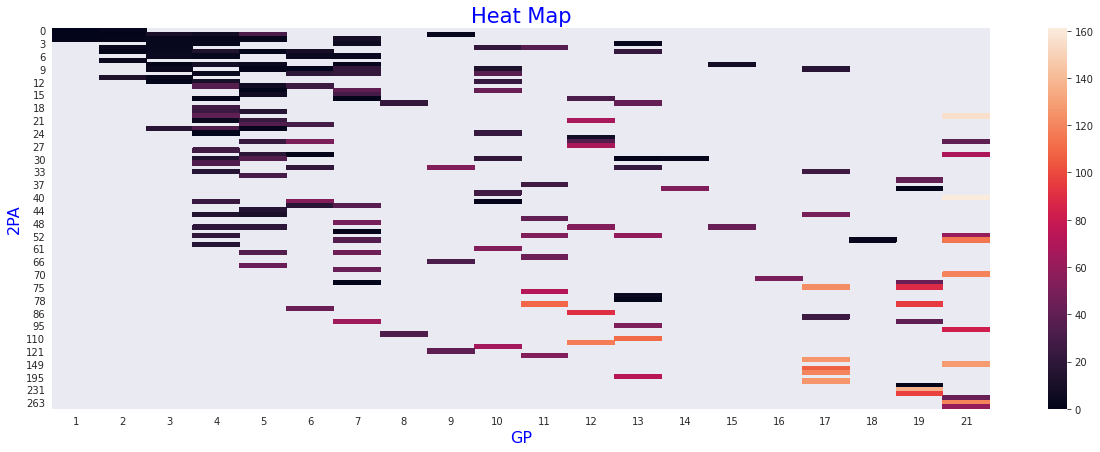

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
plt.figure(figsize=(21,7))
pts = nba_20_copy.pivot_table("3PA", "2PA", "GP")
plt.xlabel('Game Played', size = 16, color='b')
plt.ylabel('2_Points', size = 16, color='b')
plt.title('Heat Map', size = 21, color='b')

ax = sns.heatmap(pts)

## RELATION BETWEEN AGE AND MINUTE/GAME  

In [ ]:
px.histogram(nba_20_copy, x = 'AGE', y = 'MPG', color= 'TEAM', title='Age Vs. Minutes')

In [ ]:
px.scatter(nba_20_copy, x = 'two_pa', y = 'AGE', color='TEAM', title='2Pt Vs. Age', template='plotly_white')

In [ ]:
import plotly.figure_factory as ff

##Age density plot + Histogram

In [ ]:
x = nba_20_copy.AGE
hist_data = [x]
group_labels = ['nba_20_copy']

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

##pass/Game played density plot 

In [ ]:
x = nba_20_copy.GP
hist_data = [x]
group_labels = ['nba_20_copy'] # dataframe

fig = ff.create_distplot(hist_data, group_labels)
#fig.show()

fig.update_layout(title_text='Passes/Game Distribution')
fig.show()

#Two point by the team (histogram)

In [ ]:
px.histogram(nba_20_copy, x = 'TEAM', y = '2PA', color='TEAM', title='Two Points by a Team', template='plotly_white')

In [ ]:
fig = px.bar(nba_20_copy, x="TEAM", y="2PA", color='3PA', title='2Points Vs. 3Poins By a Team')
fig.show()

In [ ]:
nba_20_copy.groupby('FULL_NAME')['2PA'].value_counts()

FULL_NAME        2PA
Aaron Holiday    12     1
Abdel Nader      2      1
Al Horford       21     1
Alec Burks       33     1
Alex Caruso      52     1
                       ..
Victor Oladipo   23     1
Vincent Poirier  0      1
Wenyen Gabriel   10     1
Wes Iwundu       13     1
Wesley Matthews  14     1
Name: 2PA, Length: 216, dtype: int64

In [ ]:
nba_20_copy.groupby('FULL_NAME')[['2PA', '3PA']].sum()

## Need to rename several columns for analysis

In [ ]:
pd.pivot_table(nba_20_copy, index = ['TEAM', 'FULL_NAME'],  values=['2PA', '3PA'], aggfunc=['sum'])

sum    
                         2PA 3PA
TEAM FULL_NAME                  
Bos  Brad Wanamaker       33  27
     Carsen Edwards        0   0
     Daniel Theis         91  26
     Enes Kanter          41   1
     Gordon Hayward       26  24
...                       ..  ..
Uta  Nigel Williams-Goss   0   0
     Rayjon Tucker         2   3
     Royce O'Neale        10  22
     Rudy Gobert          74   0
     Tony Bradley          9   0

[216 rows x 2 columns]

In [ ]:
pd.pivot_table(nba_20_copy, index = ['TEAM', 'FULL_NAME'],  values=['2PA', '3PA'], aggfunc=['count', 'max'])

count     max    
                           2PA 3PA 2PA 3PA
TEAM FULL_NAME                            
Bos  Brad Wanamaker          1   1  33  27
     Carsen Edwards          1   1   0   0
     Daniel Theis            1   1  91  26
     Enes Kanter             1   1  41   1
     Gordon Hayward          1   1  26  24
...                        ...  ..  ..  ..
Uta  Nigel Williams-Goss     1   1   0   0
     Rayjon Tucker           1   1   2   3
     Royce O'Neale           1   1  10  22
     Rudy Gobert             1   1  74   0
     Tony Bradley            1   1   9   0

[216 rows x 4 columns]

#sorted 2pt and 3pt by a player (descending)

In [ ]:
nba_20_copy.sort_values(by=['two_pa', 'three_pa'], ascending=False).head(5)

,RANK,FULL_NAME,TEAM,POS,AGE,GP,MPG,MIN%Minutes_PercentagePercentage_of_team_minutes_used_by_a_player_while_he_was_on_the_floor,"USG%Usage_RateUsage_rate,_a.k.a.,_usage_percentage_is_an_estimate_of_the_percentage_of_team_plays_used_by_a_player_while_he_was_on_the_floor",TO%Turnover_RateA_metric_that_estimates_the_number_of_turnovers_a_player_commits_per_100_possessions,FTA,FT%,two_pa,2P%,three_pa,3P%,"eFG%Effective_Shooting_PercentageWith_eFG%,_three-point_shots_made_are_worth_50%_more_than_two-point_shots_made._eFG%_Formula=(FGM+_(0.5_x_3PM))/FGA","TS%True_Shooting_PercentageTrue_shooting_percentage_is_a_measure_of_shooting_efficiency_that_takes_into_account_field_goals,_3-point_field_goals,_and_free_throws.",PPGPointsPoints_per_game.,RPGReboundsRebounds_per_game.,TRB%Total_Rebound_PercentageTotal_rebound_percentage_is_estimated_percentage_of_available_rebounds_grabbed_by_the_player_while_the_player_is_on_the_court.,APGAssistsAssists_per_game.,AST%Assist_PercentageAssist_percentage_is_an_estimated_percentage_of_teammate_field_goals_a_player_assisted_while_the_player_is_on_the_court,SPGStealsSteals_per_game.,BPGBlocksBlocks_per_game.,TOPGTurnoversTurnovers_per_game.,"VIVersatility_IndexVersatility_index_is_a_metric_that_measures_a_player’s_ability_to_produce_in_points,_assists,_and_rebounds._The_average_player_will_score_around_a_five_on_the_index,_while_top_players_score_above_10",ORTGOffensive_RatingIndividual_offensive_rating_is_the_number_of_points_produced_by_a_player_per_100_total_individual_possessions.,DRTGDefensive_RatingIndividual_defensive_rating_estimates_how_many_points_the_player_allowed_per_100_possessions_he_individually_faced_while_staying_on_the_court.
45,NaN,Anthony Davis,Lal,F-C,27.59,21,36.6,76.3,27.8,10.8,179,0.832,299,0.609,60,0.383,0.603,0.665,27.7,9.7,15.6,3.5,16.1,1.24,1.43,2.52,10.7,127.8,102.0
102,NaN,LeBron James,Lal,F,35.78,21,36.3,75.6,30.4,15.8,150,0.720,263,0.646,119,0.370,0.618,0.647,27.6,10.8,17.5,8.8,42.1,1.19,0.86,4.00,15.2,122.3,102.5
25,NaN,Jimmy Butler,Mia,F,31.08,21,38.4,80.0,24.6,13.5,191,0.859,252,0.512,43,0.349,0.514,0.616,22.2,6.5,9.7,6.0,26.3,1.95,0.67,2.81,9.9,123.1,107.8
107,NaN,Nikola Jokic,Den,C,25.64,19,36.5,76.1,28.9,14.1,79,0.835,245,0.555,98,0.429,0.580,0.614,24.4,9.8,16.0,5.7,28.6,1.05,0.79,3.26,12.2,116.4,102.9
147,NaN,Jamal Murray,Den,G,23.63,19,39.6,82.6,27.6,11.6,78,0.897,231,0.537,137,0.453,0.590,0.626,26.5,4.8,7.3,6.6,30.0,0.95,0.32,2.79,9.5,121.5,111.7


In [ ]:
nba_20_copy['2PA'].max()

299

In [ ]:
#nba_20_copy.loc[nba_20_copy.2PA== 299] #not working bc of 3PA. change the column name

#You must install upgrade plotly and restart the kernal

In [ ]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.3)


In [ ]:
import plotly.express as px

fig = px.sunburst(nba_20_copy, path=['TEAM', 'FULL_NAME', '2PA', '3PA'], values='3PA')
fig.show()

#pie chart for 2pts by a team

In [ ]:

fig = px.pie(nba_20_copy, values='two_pa', names='TEAM',title='2 Points Percent',template='plotly_dark' )
fig.show()

#pie chart 3pts by a team

In [ ]:

fig = px.pie(nba_20_copy, values='three_pa', names='TEAM',title='3 Points Percent',template='plotly_dark' )
fig.show()

#Dounut chart for Two points percent for each team

In [ ]:
import plotly.graph_objects as go

labels = nba_20_copy.TEAM
values = nba_20_copy.two_pa

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.2)])
fig.show()

#3pts pie chart

In [ ]:
import plotly.graph_objects as go

labels = nba_20_copy.TEAM
values = nba_20_copy.three_pa

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

#two donut charts side by side comparing 2pts va. 3pts 

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = nba_20_copy.TEAM

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=nba_20_copy.two_pa, name="Two Points"),
1,1)
fig.add_trace(go.Pie(labels=labels, values=nba_20_copy.three_pa, name="Three Points"),
              1, 2)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="2-Pts Vs. 3-Pts",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2_Pts', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='3_Pts', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

#Stacked bar chart, Comparing 2pts. Vs. 3pts.

In [ ]:
fig = px.bar(nba_20_copy, x="TEAM", y=[nba_20_copy.two_pa, nba_20_copy.three_pa], title="2Pts. Vs. 3Pts.")
fig.show()

#Total points by Two_pts

In [ ]:
#Total points by Two_pts
pd.pivot_table(nba_20_copy, index='TEAM', values=['two_pa', 'three_pa'], aggfunc='sum', margins=True)


,three_pa,two_pa
TEAM,,
Bos,619,825
Bro,184,181
Dal,225,310
Den,615,953
Hou,561,468
Ind,128,193
Lac,427,696
Lal,718,1046
Mia,746,977


#Bar chart for the Sum of Two_pts by each Team  

In [ ]:
px.histogram(nba_20_copy, x = 'TEAM', y='two_pa', color="TEAM", title = 'Sum of Two points', template='plotly_white')

In [ ]:
px.histogram(nba_20_copy, x = 'TEAM', y='three_pa', color="TEAM", title = 'Sum of Three points', template='plotly_white')

#Group comparision, 2pts vs.3pts side by side bar graph

In [ ]:
import plotly.graph_objects as go


fig = go.Figure(data=[
    go.Bar(name='Pts_2', x=nba_20_copy.TEAM, y=nba_20_copy.two_pa),
    go.Bar(name='Pts_3', x=nba_20_copy.TEAM, y=nba_20_copy.three_pa)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

#Analyze data by a team (subset)

#dataframe for lakers

In [ ]:
df_lal = nba_20_copy.loc[nba_20_copy.TEAM == 'Lal']
df_lal.sample(11)

#renaming columns

In [ ]:
nba_20_copy  =nba_20_copy.rename(columns={"2PA": "two_pa", "3PA": "three_pa"})
nba_20_copy.columns

#Sum of two/three pts by a player

In [ ]:
px.histogram(df_lal, x = 'three_pa' , y='two_pa', color = 'FULL_NAME', title='Lakers_2_3_points_Sum', template='plotly_dark')

#Heatmap 2/3 pts by a player

In [ ]:
fig = px.bar(df_lal, x="FULL_NAME", y="two_pa", color='three_pa', title='2Points Vs. 3Poins By a PLAYER', template='plotly_white')
fig.show()

#heatmap 2 Vs. 3 pts by a player 

In [ ]:
fig = px.bar(df_lal, x="FULL_NAME", y="three_pa", color='two_pa', title='2Points Vs. 3Poins By a PLAYER', template='plotly_dark')
fig.show()

#Scatter plot 2 Vs. 3 by a player

In [ ]:
px.scatter(df_lal, x = 'two_pa', y = 'three_pa', color = 'FULL_NAME', title  = '2 Vs. 3 Pts', template = 'seaborn')

#box plot for 2 pts for Lakers

In [ ]:
fig = px.box(df_lal, y="two_pa", title='Box plot for 2Pts', template='plotly_white')
fig.show()

#Box plot for 3Pts. (on y-axis)

In [ ]:
fig = px.box(df_lal, y="three_pa", title='Box plot for 3Pts', template='plotly_dark')
fig.show()

#box plot on x-axis

In [ ]:
fig = px.box(df_lal, x="three_pa", title='Box plot for 3Pts', template='plotly_dark')
fig.show()